In [1]:
# cloning the repository from yolo v5 github
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# installation of all the necessary requirement
%pip install -qr requirements.txt comet_ml

import torch
import utils
 # checking setup
display = utils.notebook_init()

YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 30.3/201.2 GB disk)


In [2]:
from google.colab import files
import os
from PIL import Image
from IPython.display import display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import torch



In [3]:
!ls ../

yolov5


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vehicle.zip to vehicle.zip


In [ ]:
# unzip dataset to see the content
!unzip -q vehicle.zip -d /content/

In [ ]:
#view the content in unzipped file
!ls /content/

drive  yolov5


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
# saving a file to Google Drive
shutil.move('/content/drive/MyDrive/Colab Notebooks/vehicles', '/content/drive/My Drive/Colab Notebooks/vehicles')

In [5]:
# Accessing a file from Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/vehicles'

In [6]:
import os

# Path to your labels directory
labels_dir = '/content/drive/MyDrive/Colab Notebooks/vehicles/labels/train'
car_class_id = 0  # Class ID for "car"

for label_file in os.listdir(labels_dir):
    label_path = os.path.join(labels_dir, label_file)
    if os.path.isfile(label_path) and label_file.endswith('.txt'):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        with open(label_path, 'w') as f:
            for line in lines:
                if line.startswith(f'{car_class_id} '):
                    f.write(line)

# Do the same for validation labels if necessary
val_labels_dir = '/content/drive/MyDrive/Colab Notebooks/vehicles/labels/val'
for label_file in os.listdir(val_labels_dir):
    label_path = os.path.join(val_labels_dir, label_file)
    if os.path.isfile(label_path) and label_file.endswith('.txt'):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        with open(label_path, 'w') as f:
            for line in lines:
                if line.startswith(f'{car_class_id} '):
                    f.write(line)


In [8]:
!python train.py --img 416 --batch 5 --epochs 30 --data /content/data.yaml  --weights yolov5m.pt --cache


2024-06-22 20:05:19.858790: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 20:05:19.858845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 20:05:19.860356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=5, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False

# New section

In [10]:
# Path to the results folder
results_folder = 'runs/train/exp'

# List the contents of the folder
contents = os.listdir(results_folder)

# Display the list of all file names
print("Contents of the results folder:")
for item in contents:
    print(item)

Contents of the results folder:
PR_curve.png
val_batch1_pred.jpg
val_batch2_labels.jpg
weights
opt.yaml
train_batch2.jpg
labels.jpg
hyp.yaml
train_batch1.jpg
F1_curve.png
labels_correlogram.jpg
val_batch1_labels.jpg
val_batch0_labels.jpg
events.out.tfevents.1719086722.206d75089ae0.4064.0
results.png
P_curve.png
results.csv
val_batch0_pred.jpg
R_curve.png
val_batch2_pred.jpg
confusion_matrix.png
train_batch0.jpg


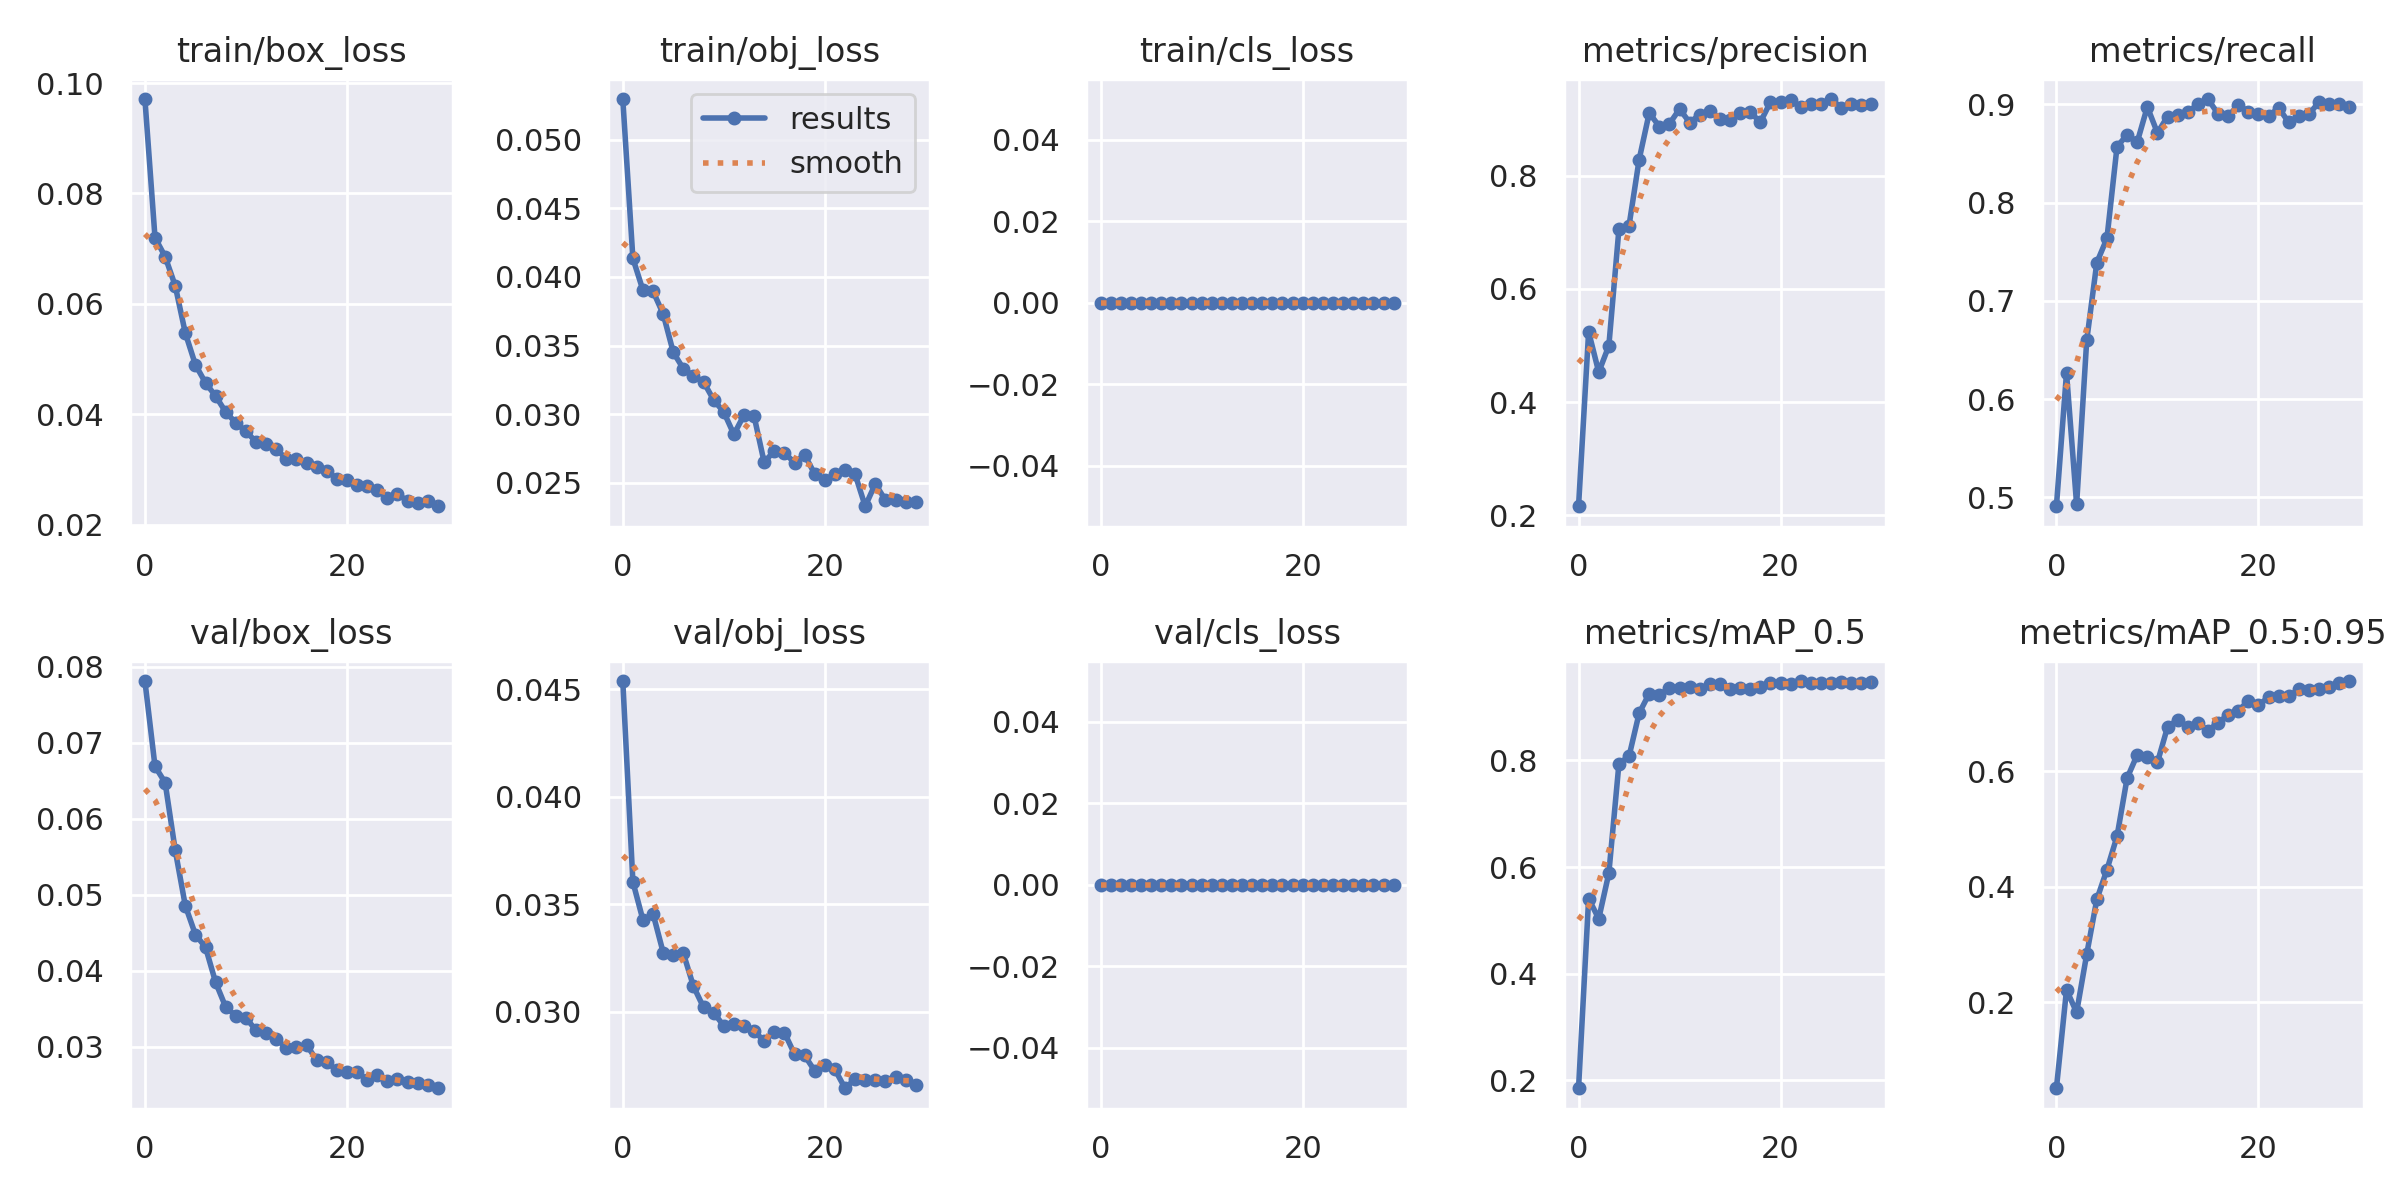

In [11]:
from PIL import Image
from IPython.display import display
#Training and Validation Loss
results = "results.png"
image_path = os.path.join(results_folder, results)
img = Image.open(image_path)
display(img)

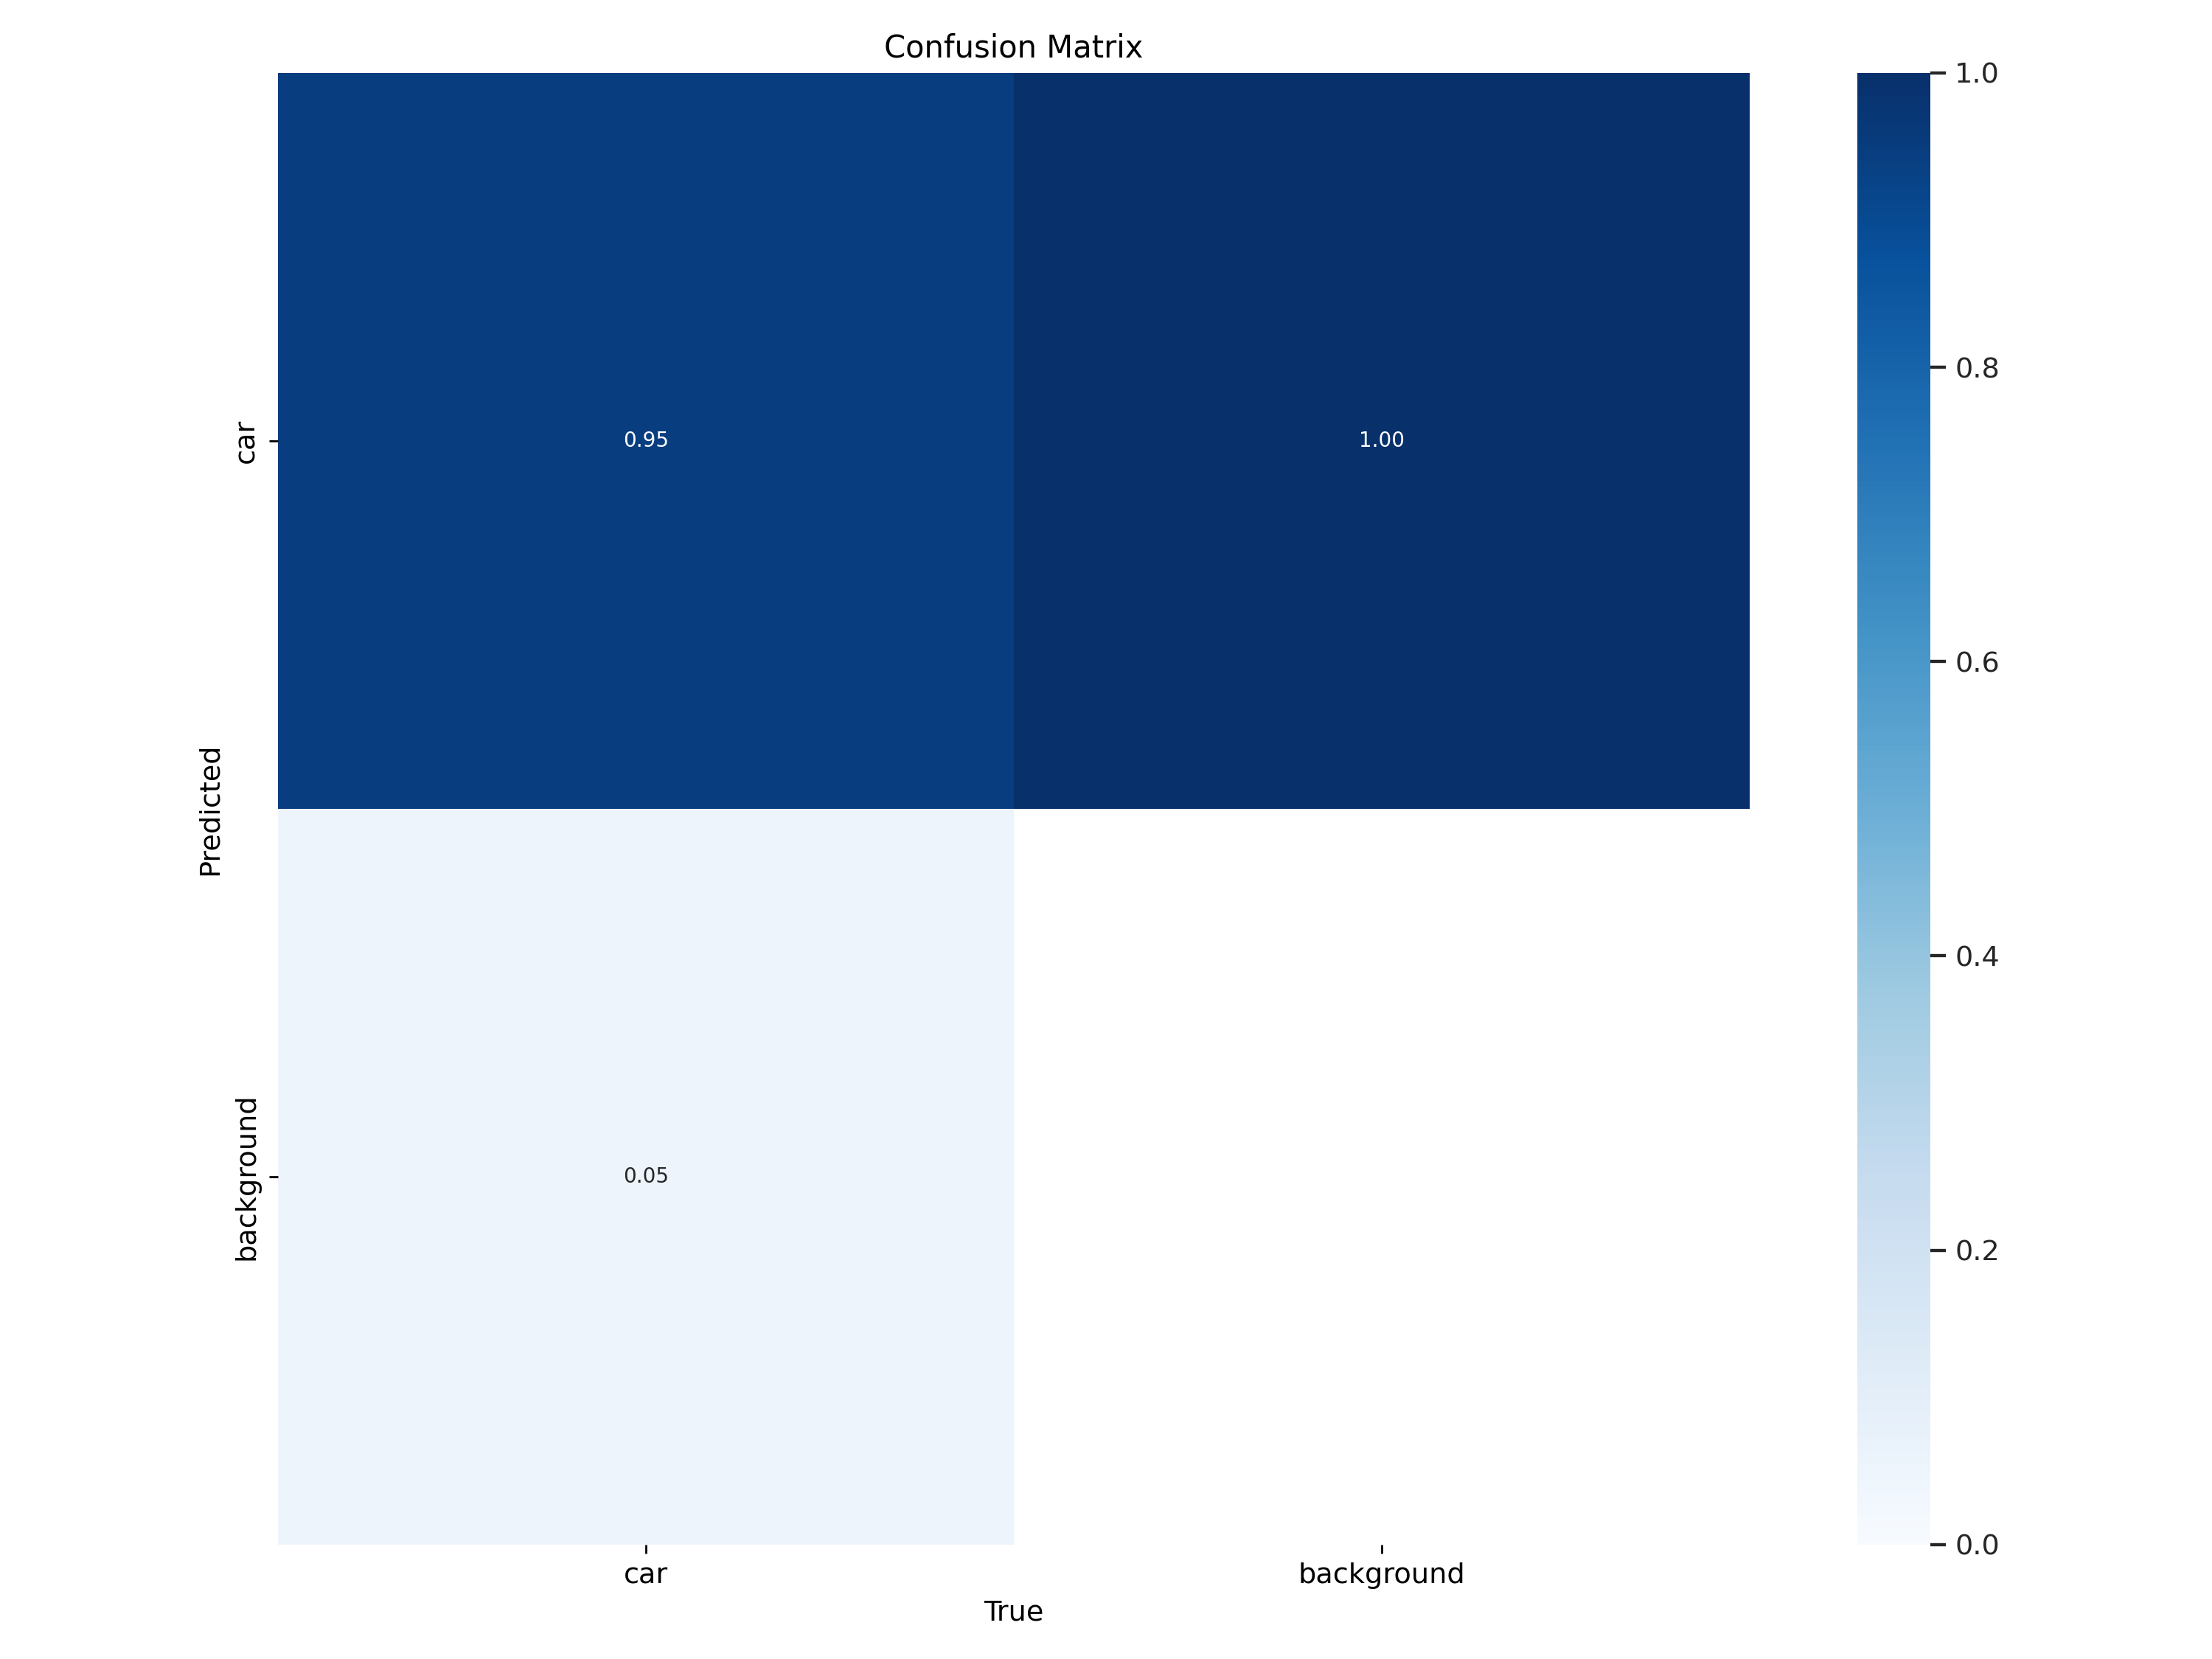

In [12]:
from PIL import Image
from IPython.display import display

# Displaying the path to the confusion matrix image
confusion_matrix_image = "/content/yolov5/runs/train/exp/confusion_matrix.png"
image_path = os.path.join(results_folder, confusion_matrix_image)

# Open and display the image
img = Image.open(image_path)
display(img)

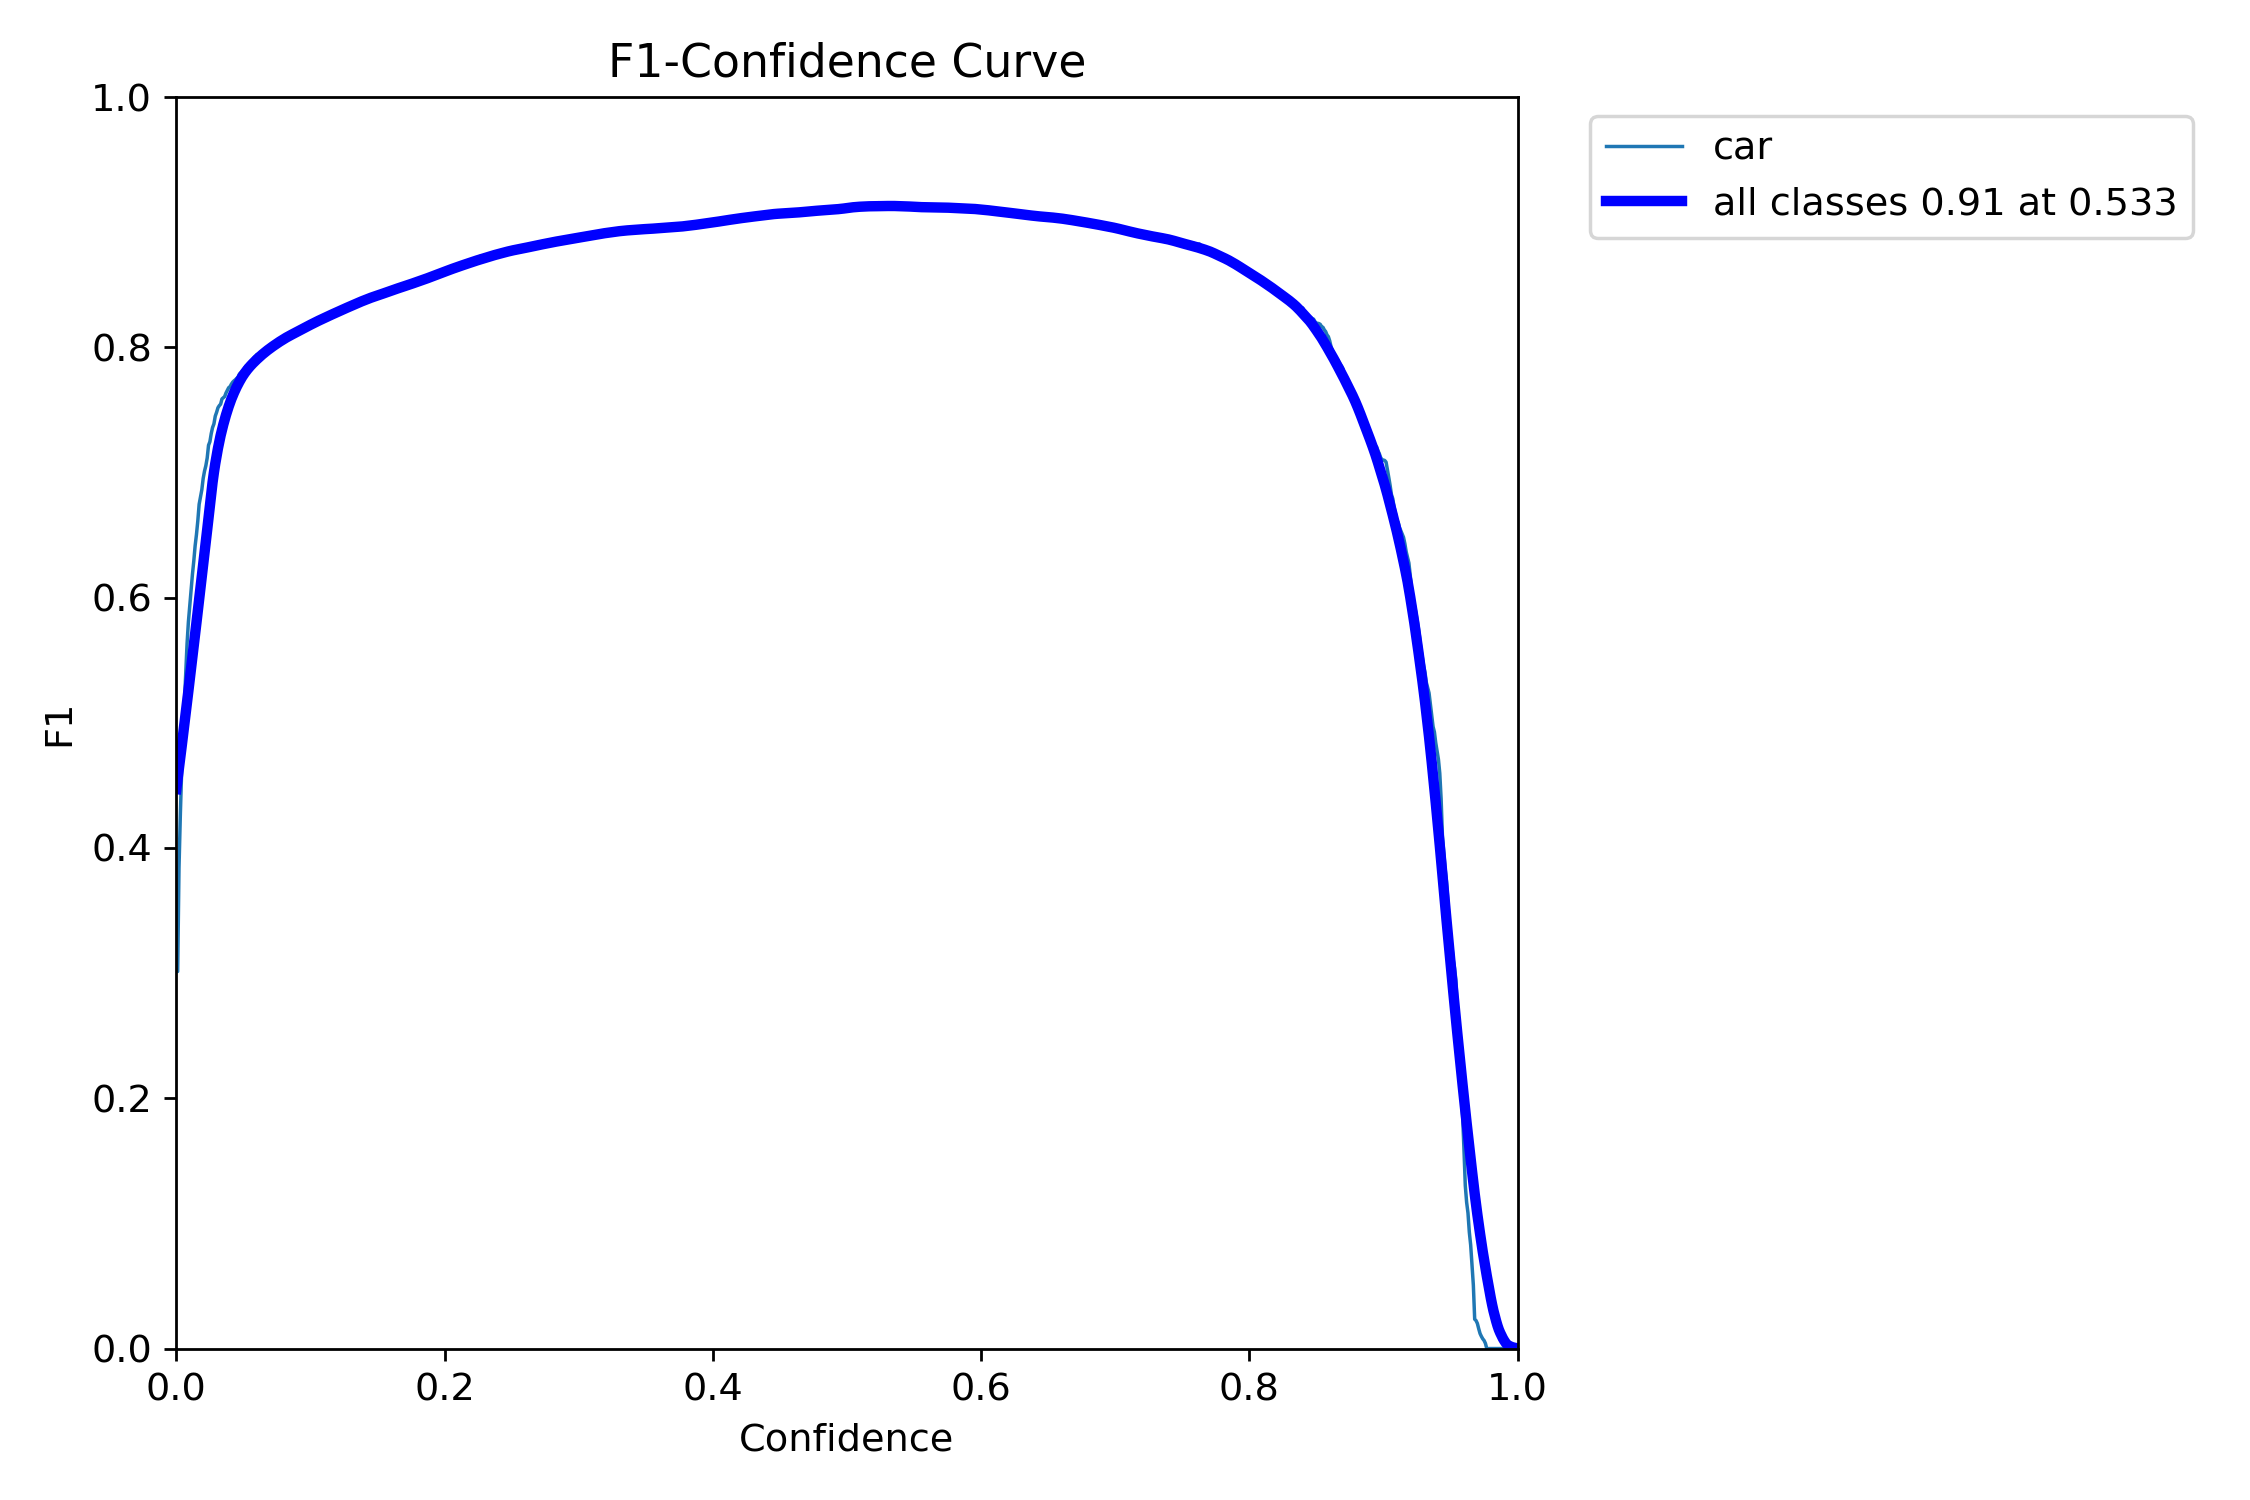

In [13]:
#Displaying F1 Confidence curve

F1_curve = "F1_curve.png"
image_path = os.path.join(results_folder, F1_curve)
img_confidence = Image.open(image_path)
display(img_confidence)

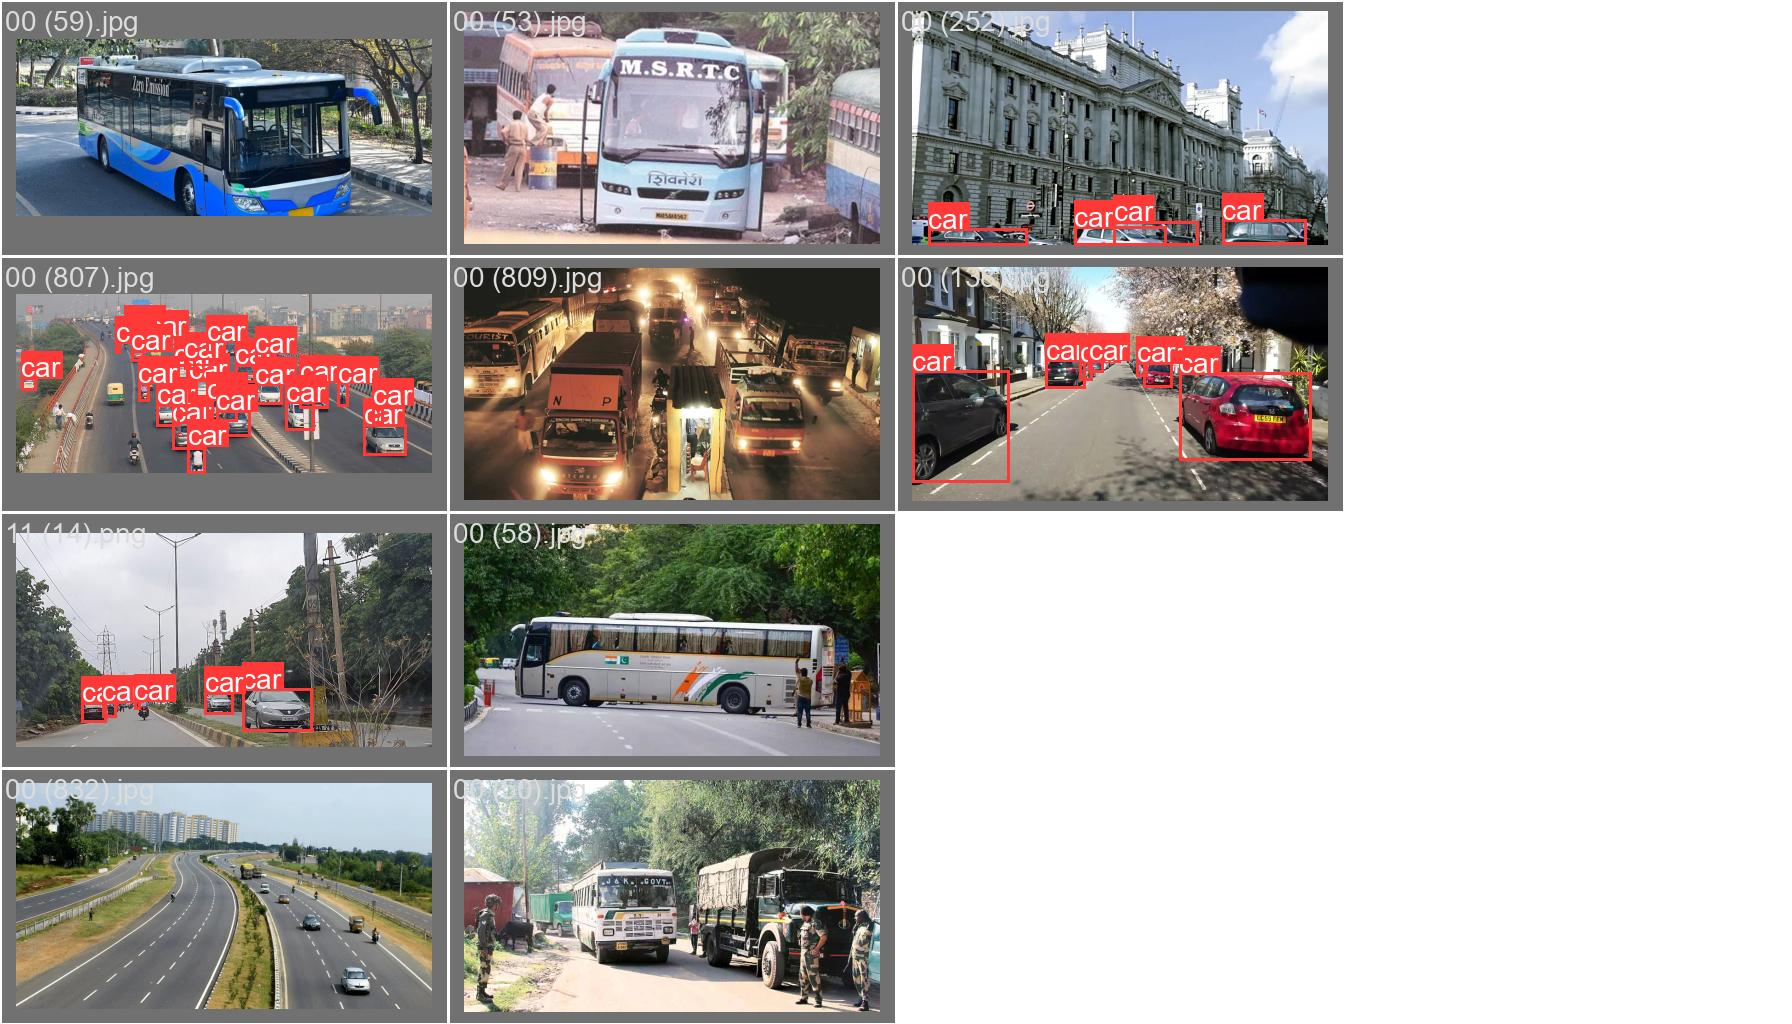

In [15]:
from IPython.display import Image, display

#Displaying Validation Batch label 0
# Define the path to the image
image_path = '/content/yolov5/runs/train/exp/val_batch0_labels.jpg'

# Display the image
display(Image(filename=image_path))


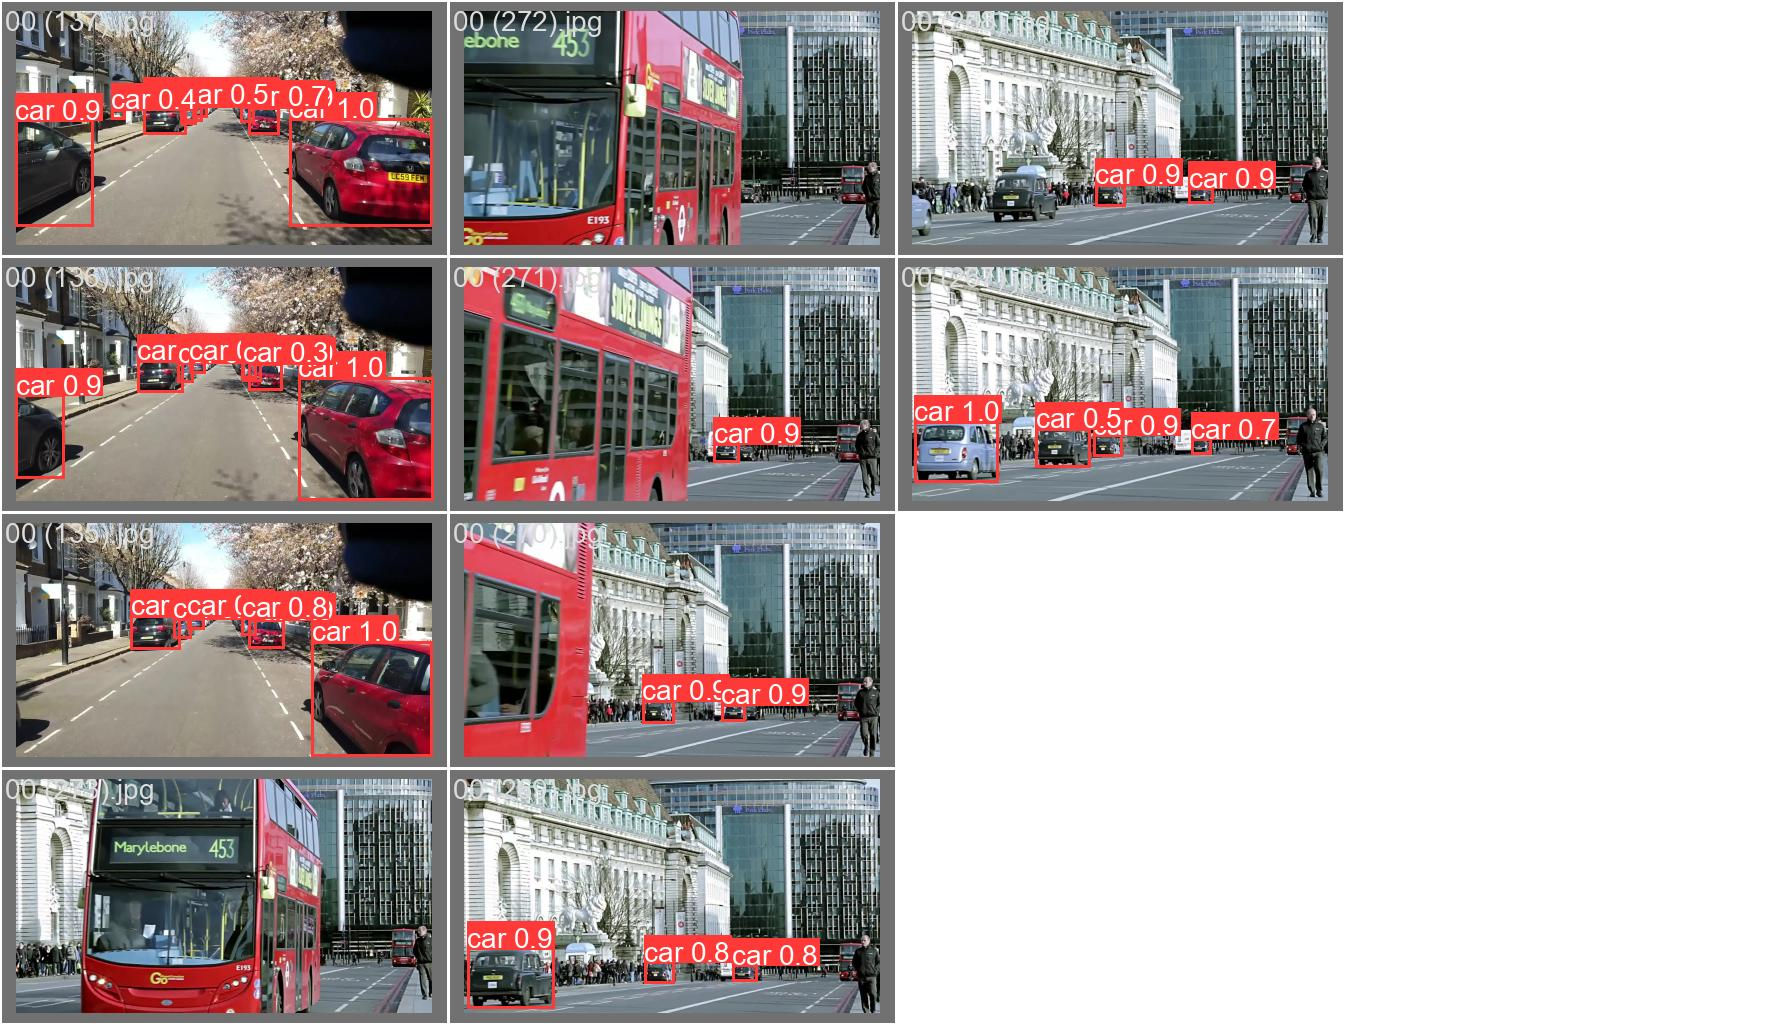

In [16]:
from IPython.display import Image, display
# Displaying Validation Prediction Batch label 0


# Define the path to the image
image_path = '/content/yolov5/runs/train/exp/val_batch1_pred.jpg'

# Display the image
display(Image(filename=image_path))

In [18]:
#Testing the trained model
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/drive/MyDrive/Colab Notebooks/vehicles/images/test/00 (308).jpg"

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/vehicles/images/test/00 (308).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/vehicles/images/test/00 (308).jpg: 640x384 16 cars, 100.2ms
Speed: 0.6ms pre-process, 100.2ms inference, 518.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


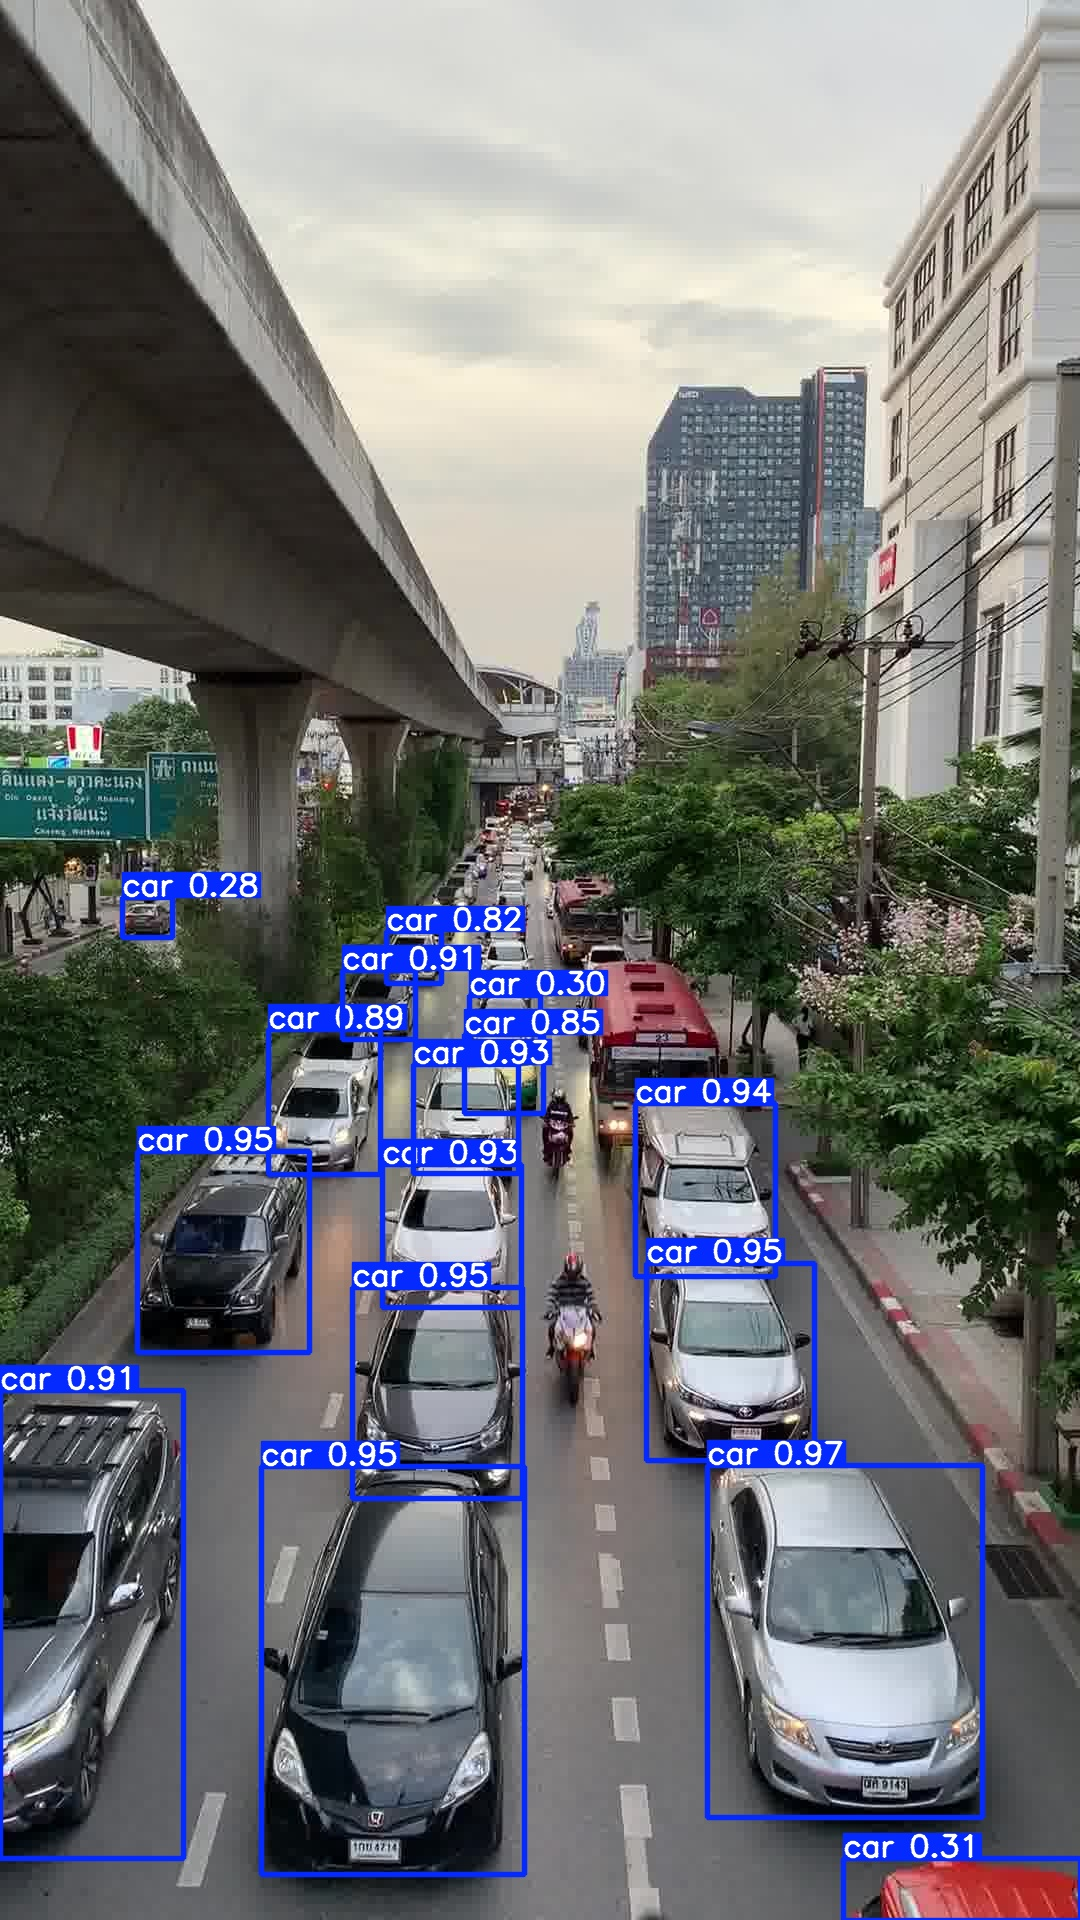

In [20]:
#Displaying Test result
from IPython.display import Image, display

# Define the path to the detected image (update this path based on where the output is saved)
result_image_path = "/content/yolov5/runs/detect/exp2/00 (308).jpg"

# Display the detected image
display(Image(filename=result_image_path, width=600))


In [35]:
#Testing Model using a video of moving cars
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source "/content/cars_movingg.mp4"

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/cars_movingg.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/979) /content/cars_movingg.mp4: 384x640 14 cars, 121.3ms
video 1/1 (2/979) /content/cars_movingg.mp4: 384x640 13 cars, 12.5ms
video 1/1 (3/979) /content/cars_movingg.mp4: 384x640 13 cars, 9.4ms
video 1/1 (4/979) /content/cars_movingg.mp4

In [9]:
# 2Train YOLOv5s on COCO128 for 50 epochs
!python train.py --img 640 --batch 10 --epochs 50 --data /content/data.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --cache


2024-06-22 20:16:01.006496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 20:16:01.006553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 20:16:01.008017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/runs/train/exp/weights/best.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=

Further Training to see better performace

In [21]:
# Path to the results folder
results_folder = 'runs/train/exp2'

# List the contents of the folder
contents = os.listdir(results_folder)

# Display the list of all file names
print("Contents of the results folder:")
for item in contents:
    print(item)

Contents of the results folder:
PR_curve.png
val_batch1_pred.jpg
val_batch2_labels.jpg
weights
opt.yaml
train_batch2.jpg
labels.jpg
hyp.yaml
train_batch1.jpg
events.out.tfevents.1719087363.206d75089ae0.7864.0
F1_curve.png
labels_correlogram.jpg
val_batch1_labels.jpg
val_batch0_labels.jpg
results.png
P_curve.png
results.csv
val_batch0_pred.jpg
R_curve.png
val_batch2_pred.jpg
confusion_matrix.png
train_batch0.jpg


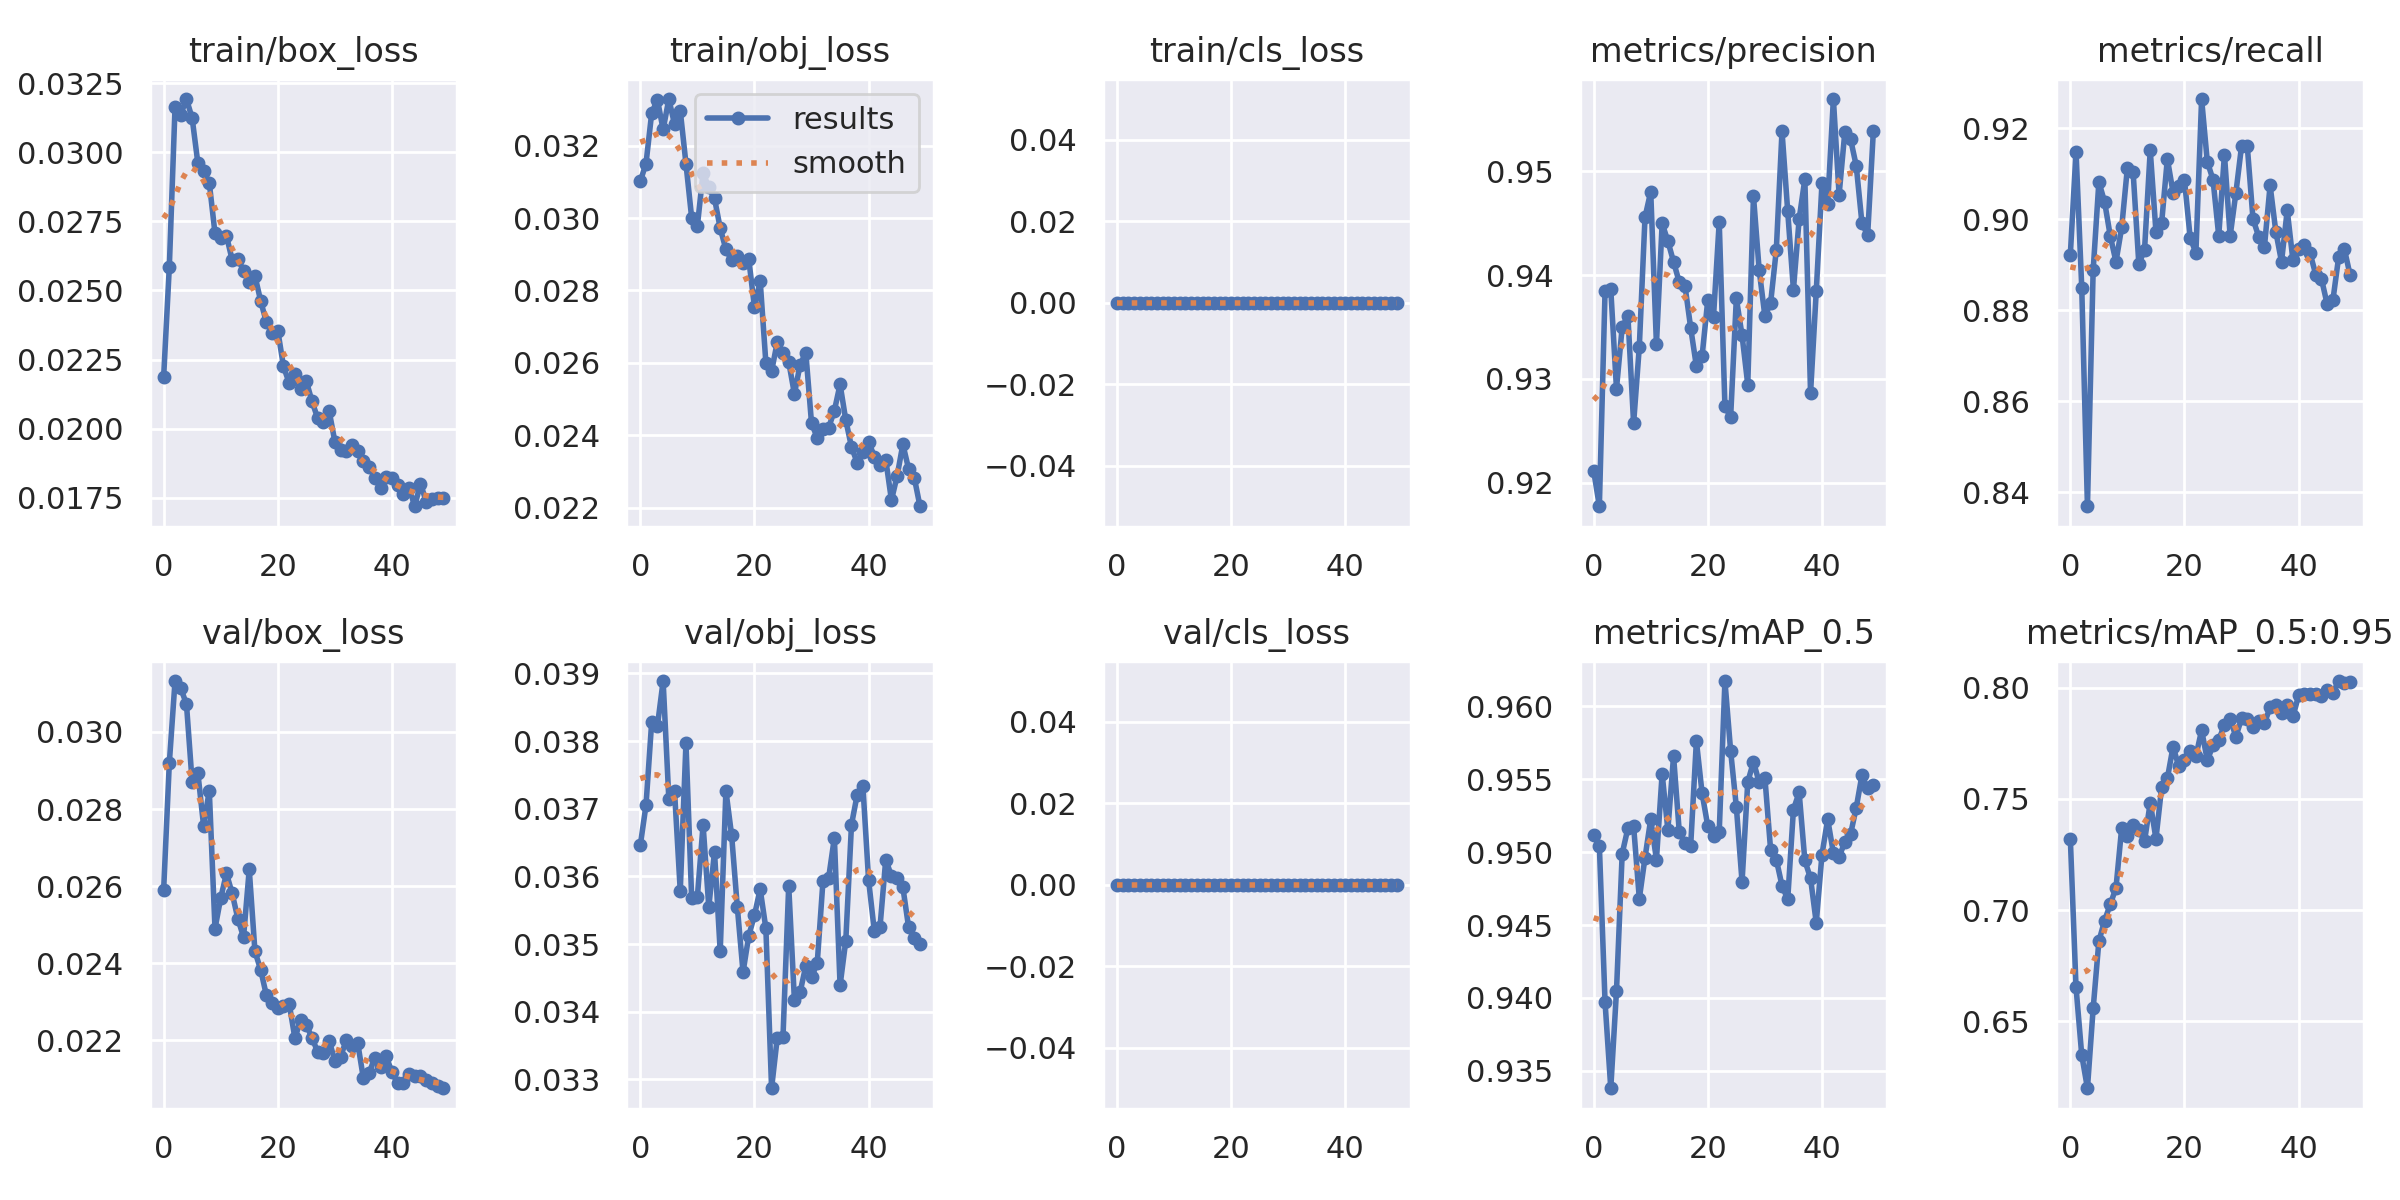

In [22]:
from PIL import Image
from IPython.display import display
#Training and Validation Loss
results = "results.png"
image_path = os.path.join(results_folder, results)
img = Image.open(image_path)
display(img)

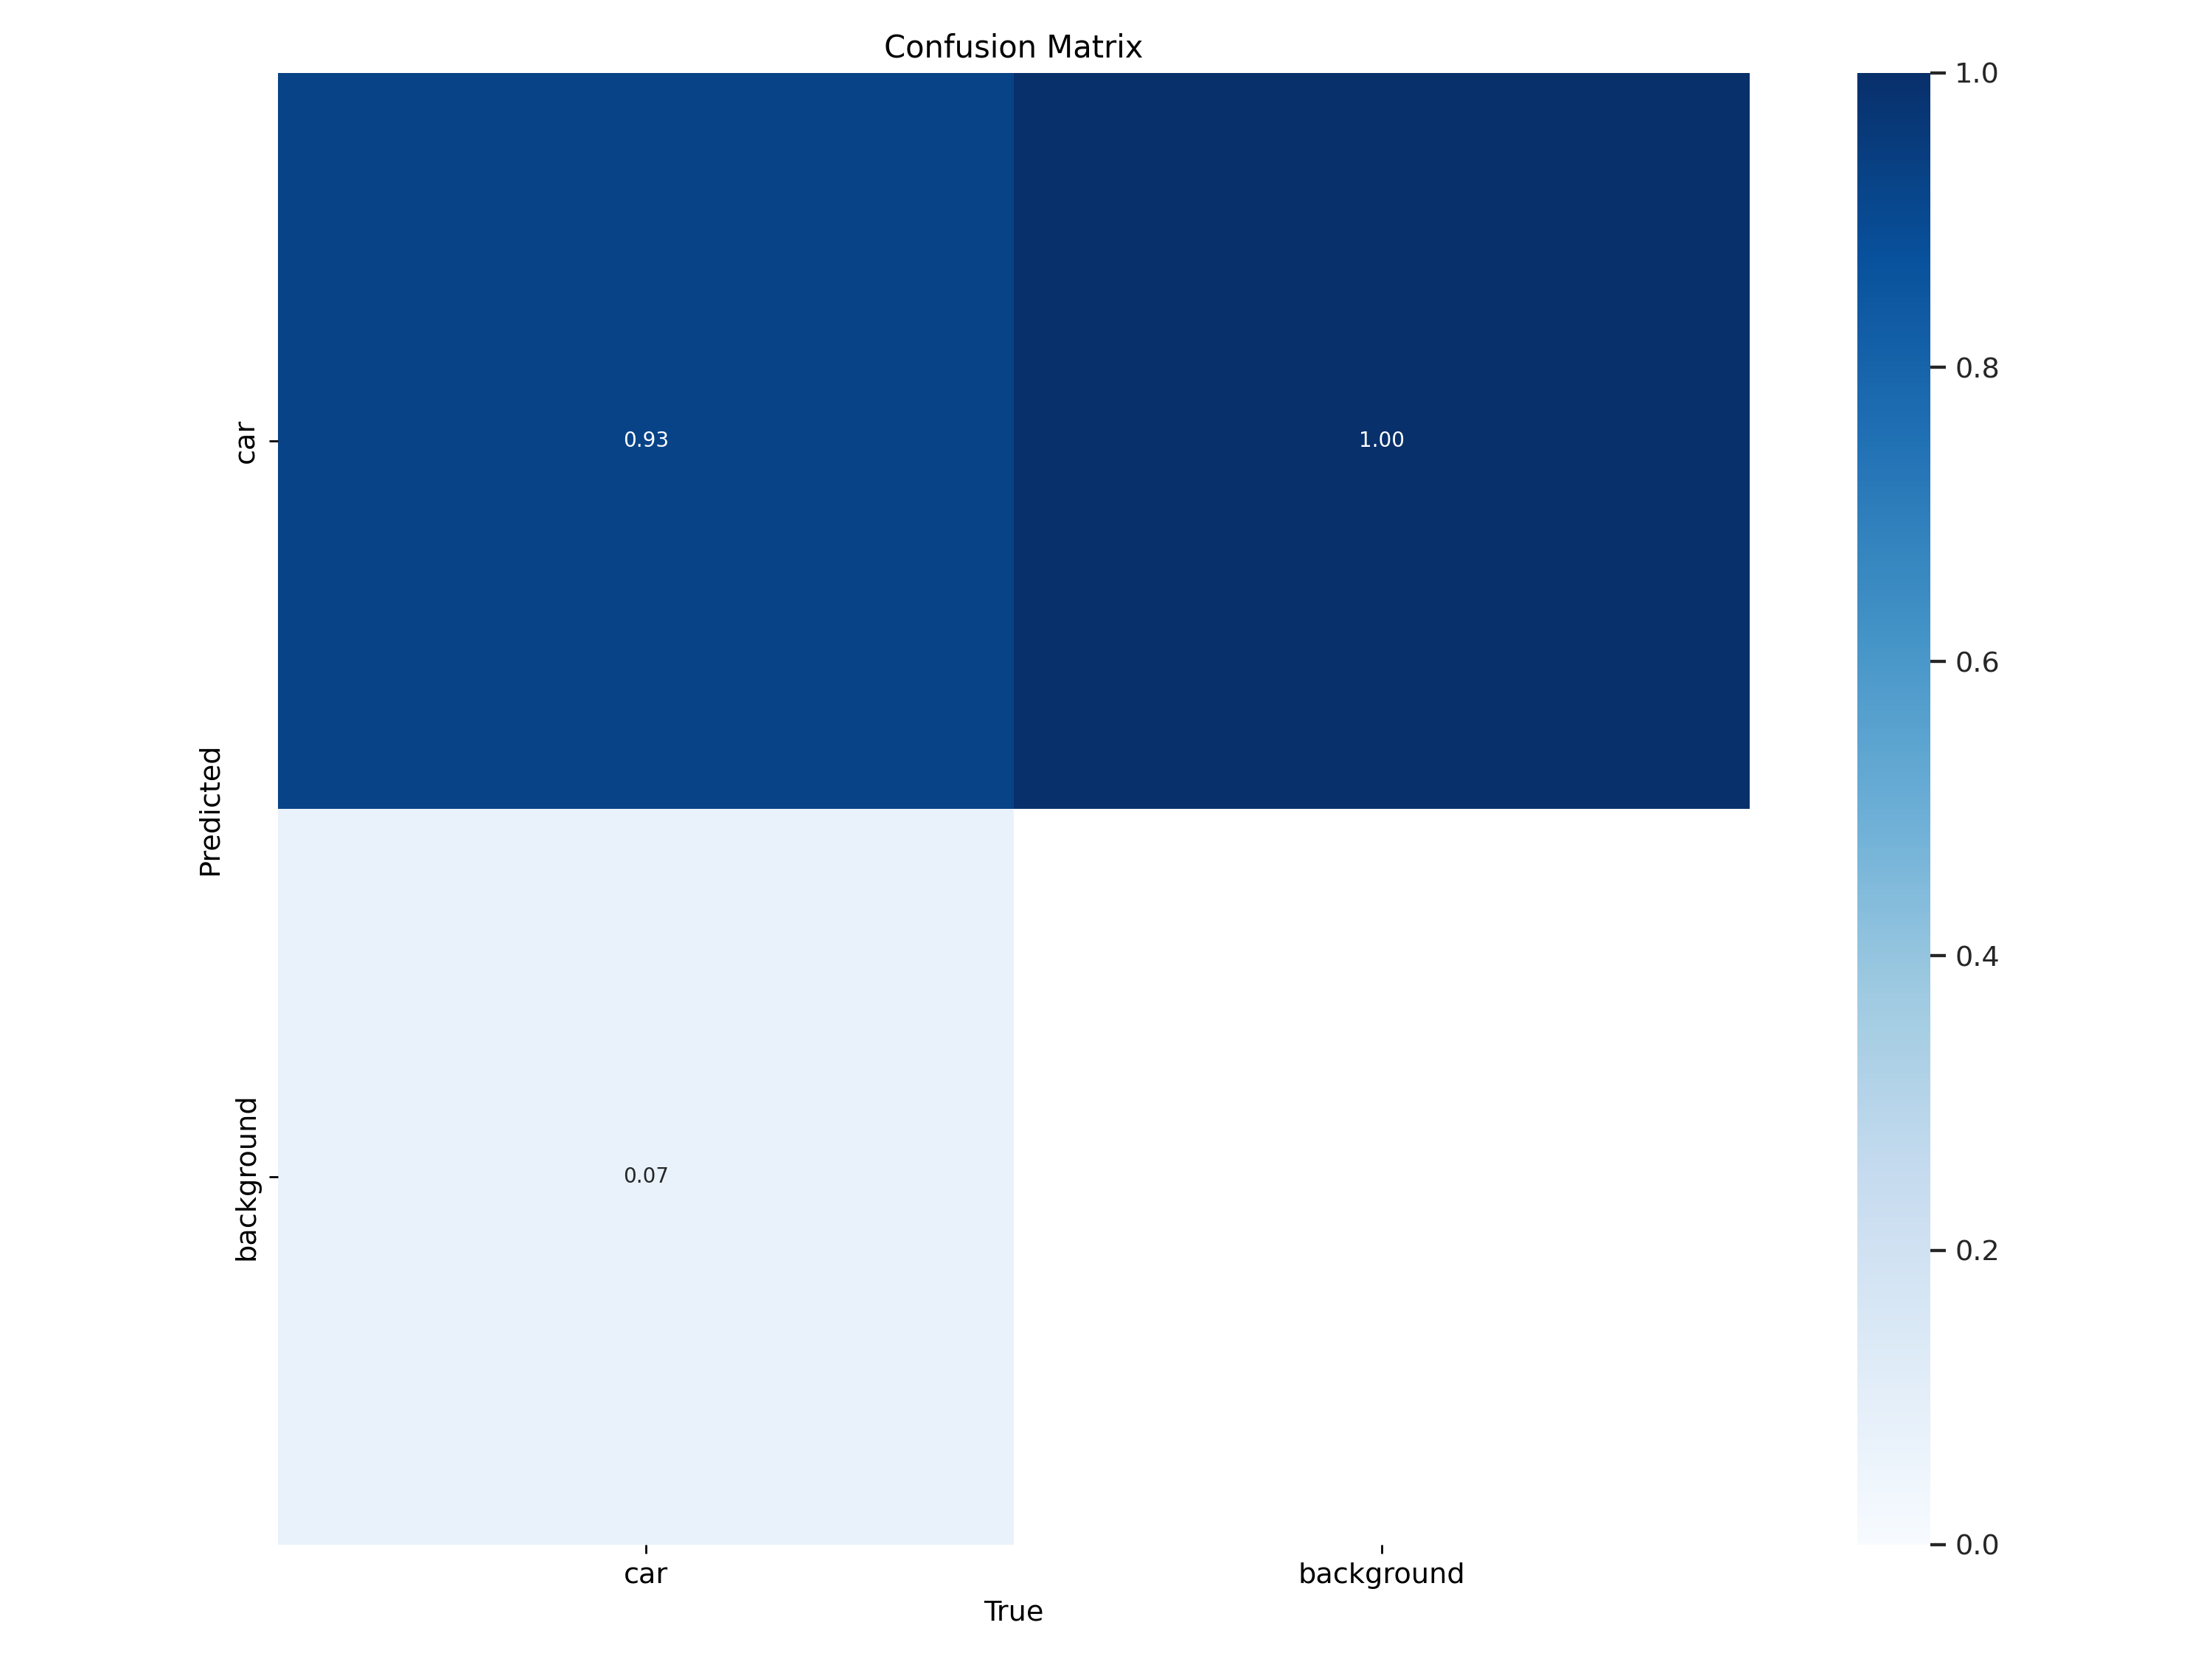

In [24]:
from PIL import Image
from IPython.display import display

# Displaying the path to the confusion matrix image
confusion_matrix_image = "/content/yolov5/runs/train/exp2/confusion_matrix.png"
image_path = os.path.join(results_folder, confusion_matrix_image)

# Open and display the image
img = Image.open(image_path)
display(img)

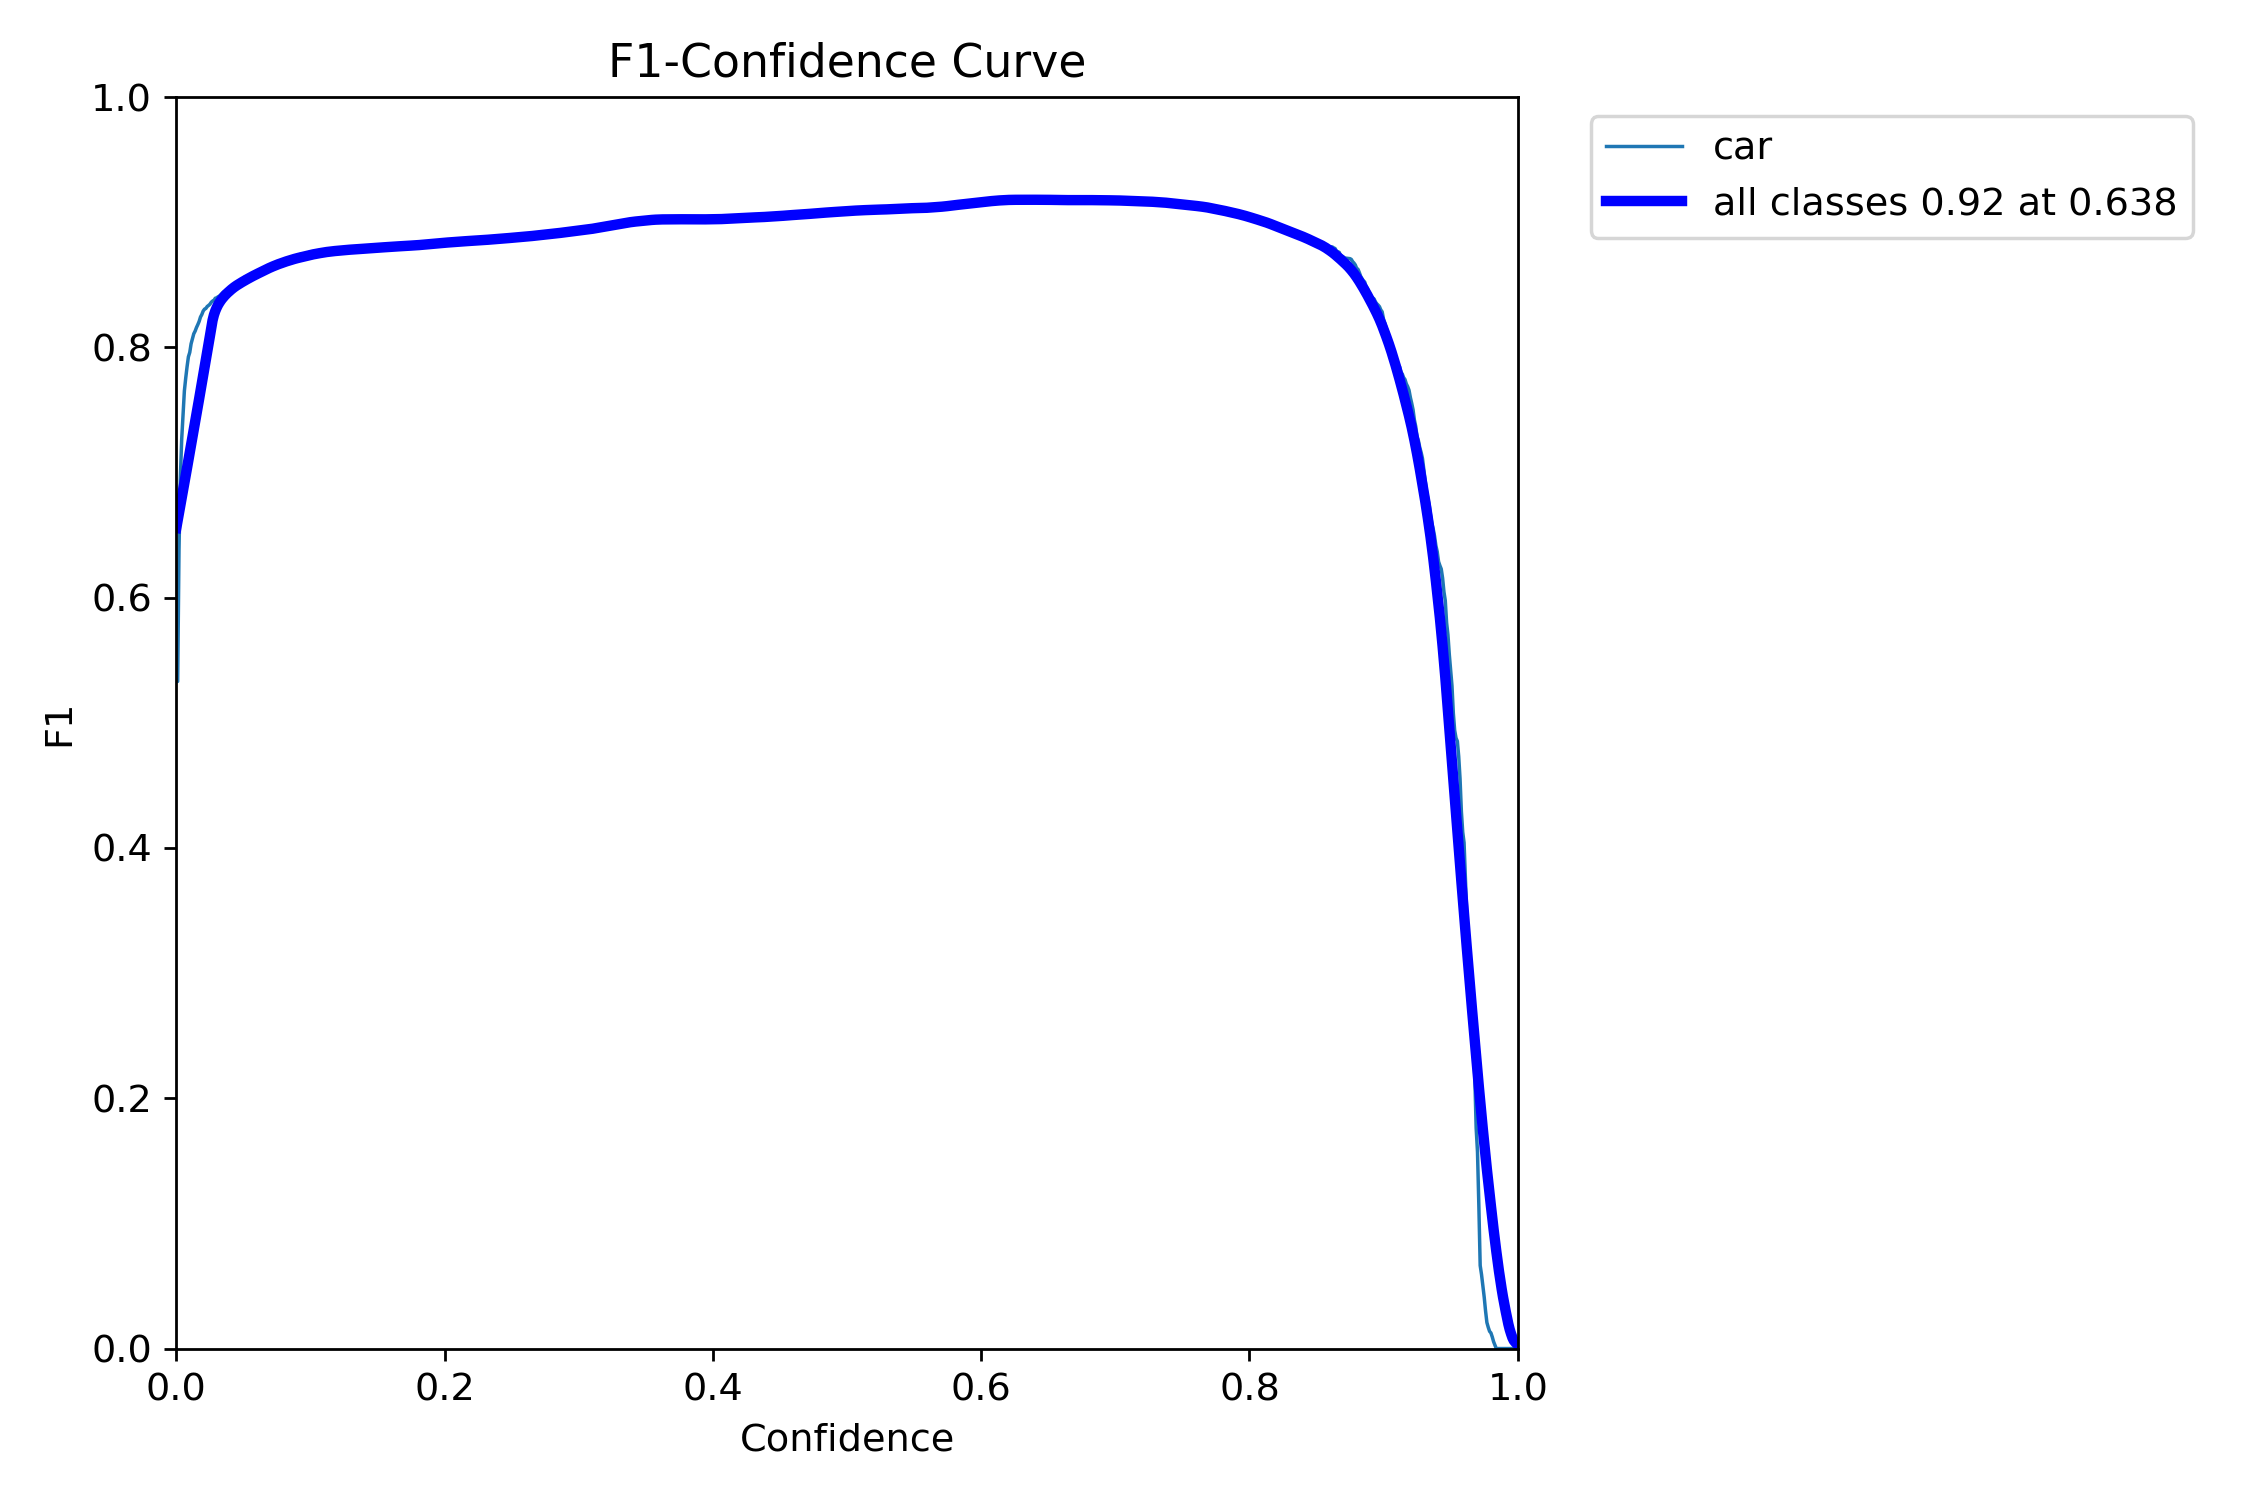

In [25]:
#Displaying F1 Confidence curve

F1_curve = "F1_curve.png"
image_path = os.path.join(results_folder, F1_curve)
img_confidence = Image.open(image_path)
display(img_confidence)

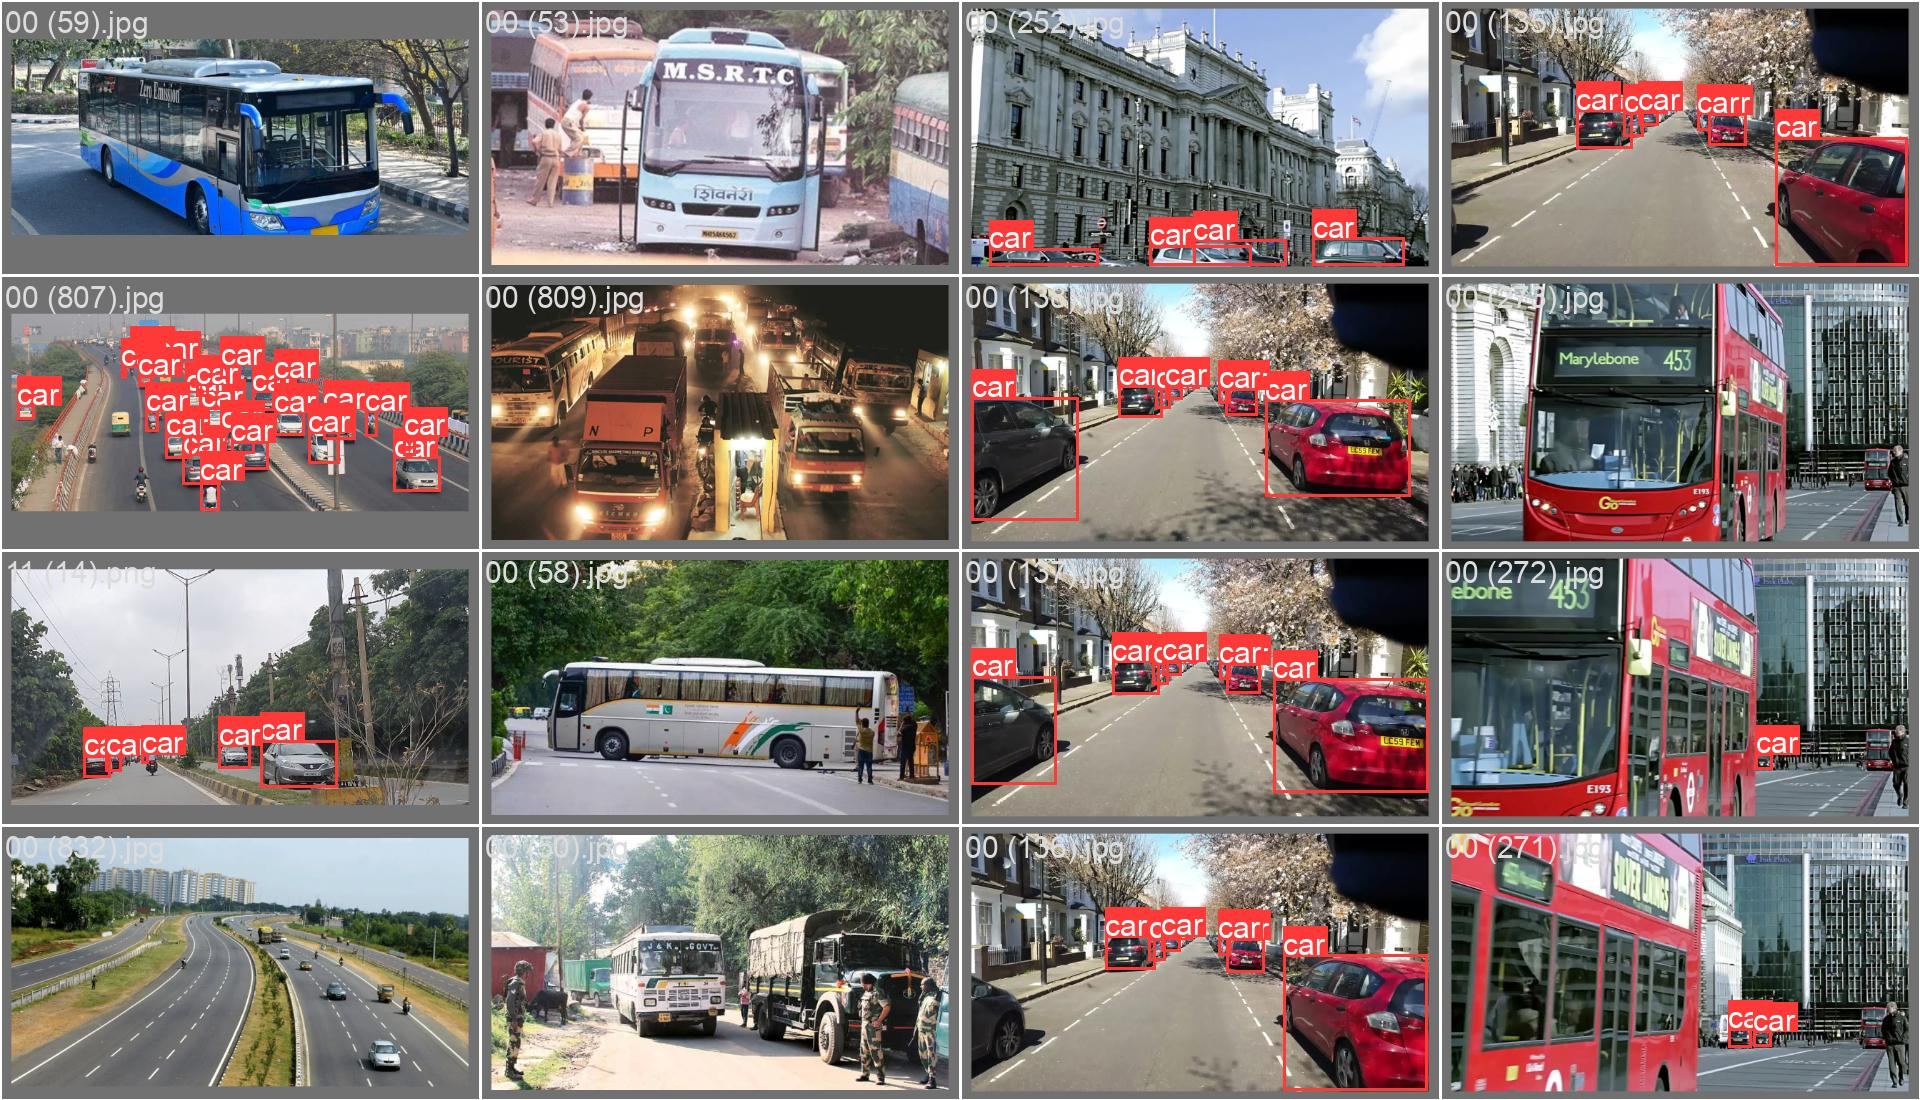

In [26]:
from IPython.display import Image, display

#Displaying Validation Batch label 0
# Define the path to the image
image_path = '/content/yolov5/runs/train/exp2/val_batch0_labels.jpg'

# Display the image
display(Image(filename=image_path))

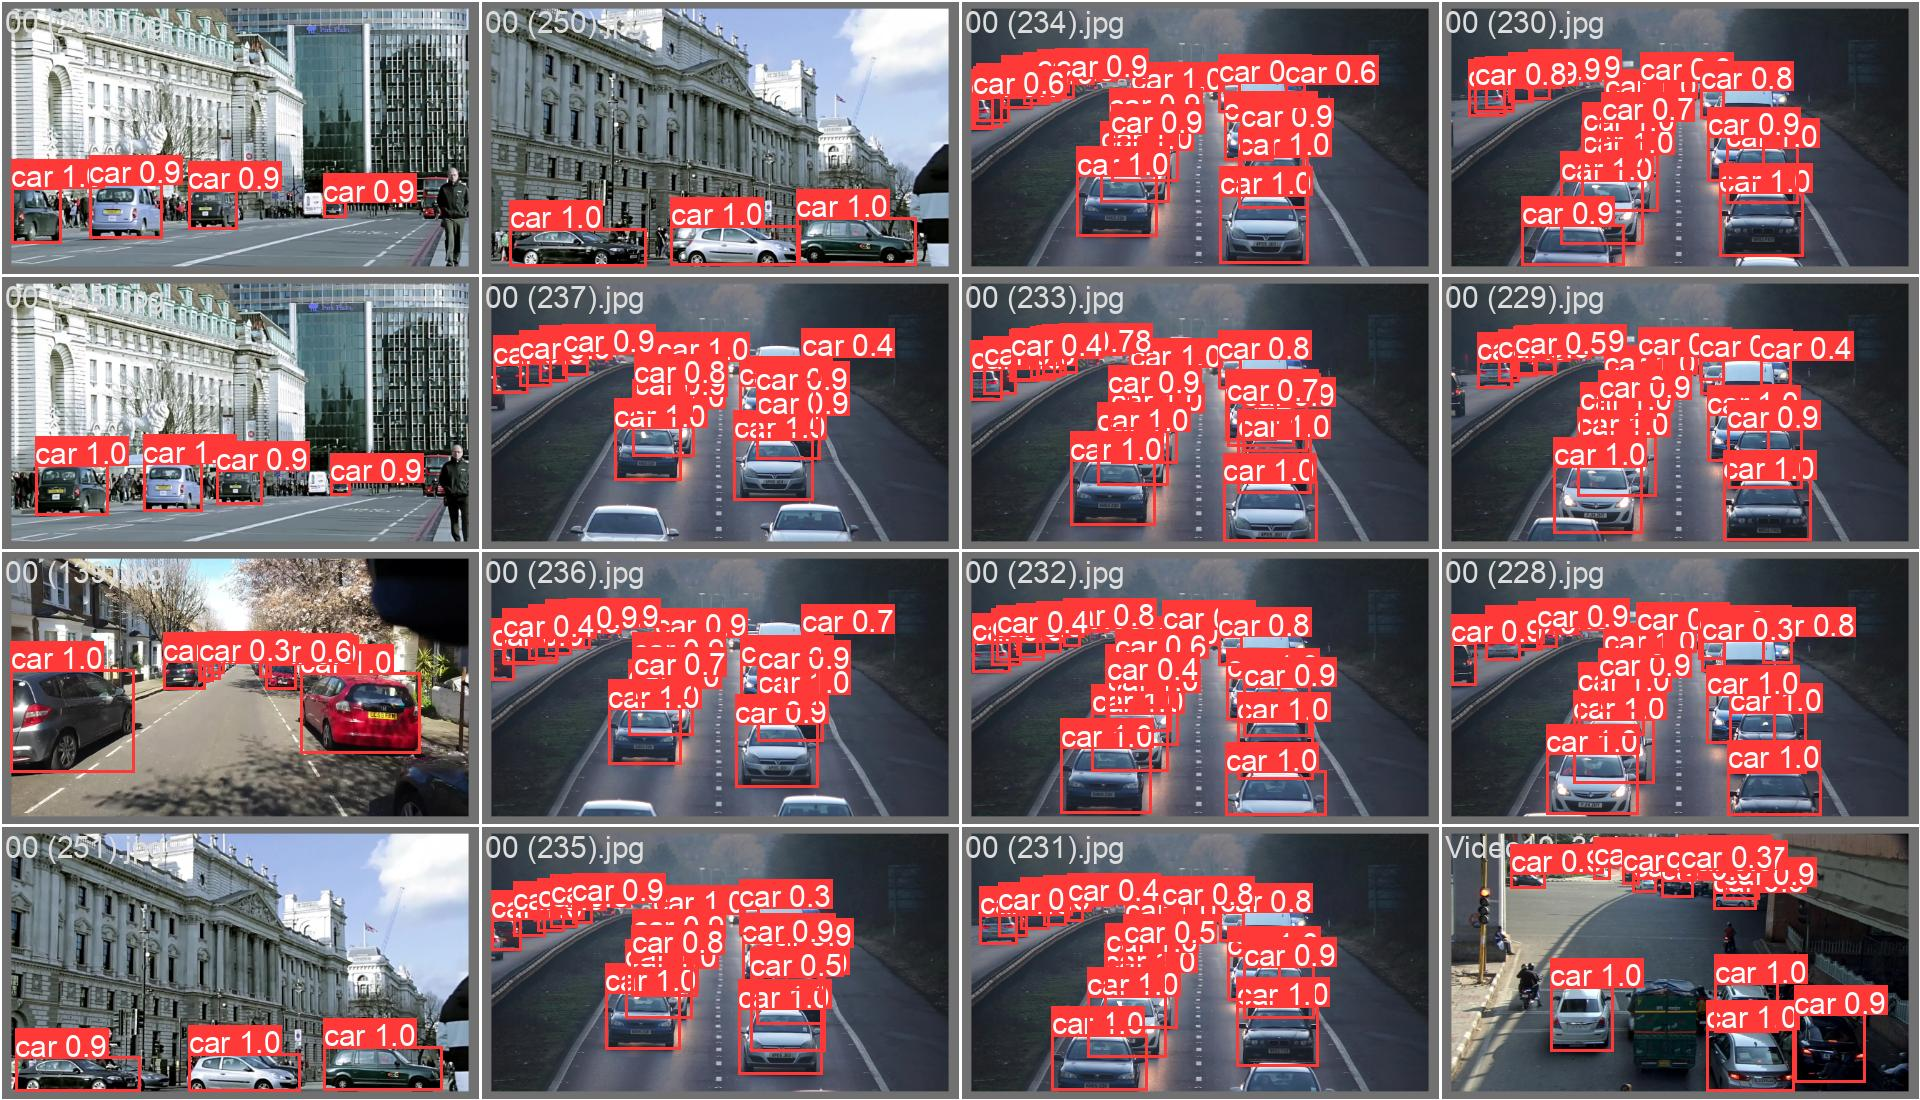

In [27]:

# Displaying Validation Prediction Batch label 0


# Define the path to the image
image_path = '/content/yolov5/runs/train/exp2/val_batch1_pred.jpg'

# Display the image
display(Image(filename=image_path))

In [ ]:
#Displaying Precision Confidence Curve

from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image
P_curve = '/content/yolov5/runs/train/exp/P_curve.png'

# Open and display the image
img = Image.open(P_curve)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
#Displaying Recall Confidence Curve
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image
R_curve = '/content/yolov5/runs/train/exp/R_curve.png'

# Open and display the image
img = Image.open(R_curve)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [29]:
#Testing the trained model
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source "/content/yolov5/runs/detect/exp2/00 (308).jpg"

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/runs/detect/exp2/00 (308).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/runs/detect/exp2/00 (308).jpg: 640x384 10 cars, 97.4ms
Speed: 0.5ms pre-process, 97.4ms inference, 589.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


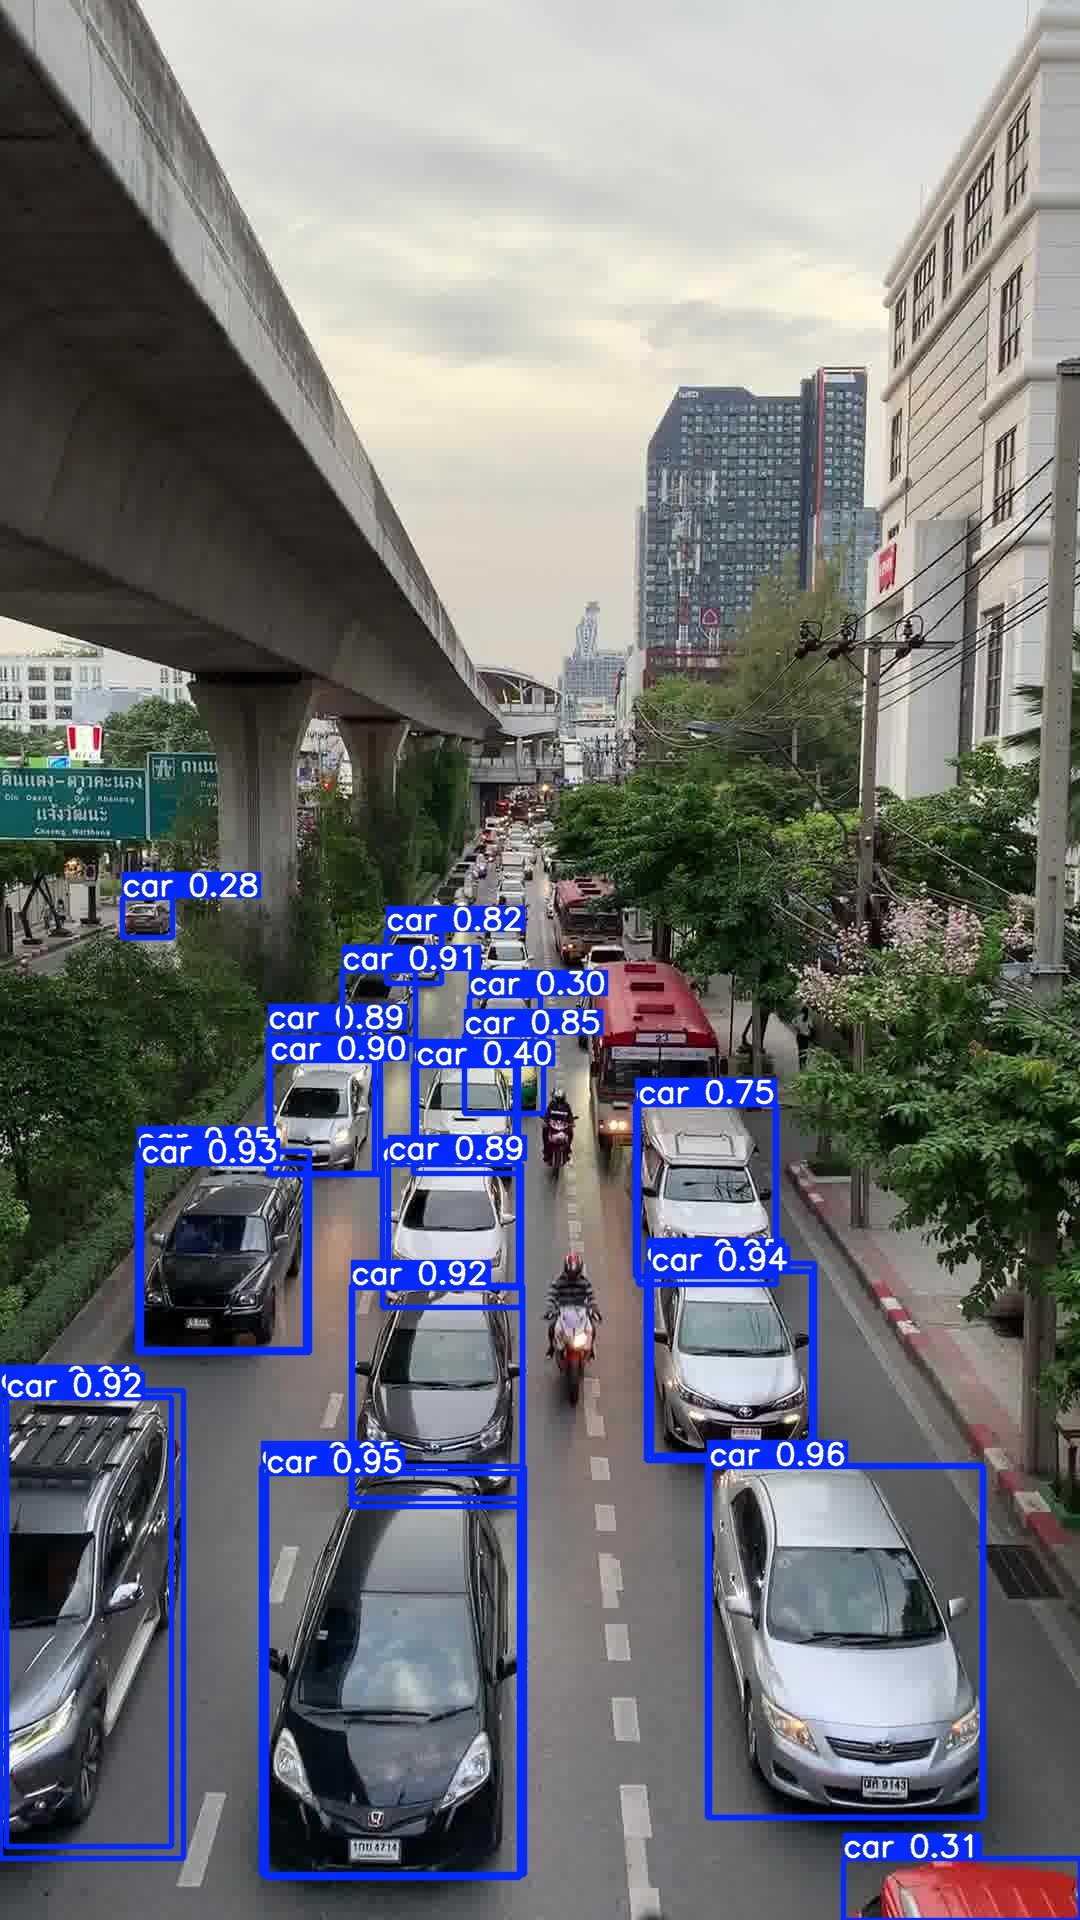

In [30]:
#Displaying Test result
from IPython.display import Image, display

# Define the path to the detected image (update this path based on where the output is saved)
result_image_path = "/content/yolov5/runs/detect/exp4/00 (308).jpg"

# Display the detected image
display(Image(filename=result_image_path, width=600))

In [34]:
#Testing Model using a video of moving cars
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source "/content/cars_movingg.mp4"

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/cars_movingg.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/979) /content/cars_movingg.mp4: 384x640 14 cars, 120.6ms
video 1/1 (2/979) /content/cars_movingg.mp4: 384x640 13 cars, 9.3ms
video 1/1 (3/979) /content/cars_movingg.mp4: 384x640 13 cars, 9.2ms
video 1/1 (4/979) /content/cars_movingg.mp4: 384x640 13 cars, 9.3ms
video 1/1 (5/979) 